In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split

In [2]:
# Load your dataset
data = pd.read_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/pca_df_36.csv')


In [3]:
dataobj = pd.read_csv('C:/Users/Imran/OneDrive - Ontario Tech University/Documents/Capstone/standardized.csv')

In [4]:
data['rar'] = dataobj['rar']

In [5]:
data = data.drop('Unnamed: 0', axis=1)


In [6]:
labels = data['rar']

In [7]:
features = data.drop('rar', axis=1)


### Creating an individual model

In [9]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Define and train the model
def create_ann(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  # Single output for regression
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and train the model
single_model = create_ann(input_dim=X_train.shape[1])
single_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

C:\Users\Imran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 54s 2ms/step - loss: 34269128.0000 - val_loss: 3824547.5000
Epoch 2/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 3502944.2500 - val_loss: 2871039.2500
Epoch 3/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 48s 1ms/step - loss: 2746582.2500 - val_loss: 2476169.2500
Epoch 4/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 2366468.2500 - val_loss: 2204209.5000
Epoch 5/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 50s 1ms/step - loss: 2173448.0000 - val_loss: 2095981.1250
Epoch 6/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 48s 1ms/step - loss: 2101301.0000 - val_loss: 2058685.1250
Epoch 7/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 52s 2ms/step - loss: 2002300.7500 - val_loss: 2011478.7500
Epoch 8/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 53s 2ms/step - loss: 1929791.3750 - val_loss: 1939592.8750
Epoch 9/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 55s 2ms/step - loss: 1865065.2500 - val_loss: 1985065.0000
Epoch 10/50
33702/33702 ━━━━━━━━━━━━━━━━━━━━ 66s 2ms/step - loss: 184675

### Creating the hybrid model

In [11]:
# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features)

# Add cluster labels to the dataset
data['cluster'] = clusters

In [12]:
def create_ann(input_dim):
    model = Sequential()
    model.add(Dense(64, input_dim=input_dim, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1))  
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Function to train ANN on a specific cluster
def train_ann_on_cluster(cluster_data):
    features = cluster_data.drop(['rar', 'cluster'], axis=1)
    labels = cluster_data['rar']
    
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)
    
    ann = create_ann(input_dim=features.shape[1])
    ann.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
    
    return ann

In [13]:
# Train an ANN for each cluster
ann_models = {}
for cluster in range(3):
    cluster_data = data[data['cluster'] == cluster]
    ann_models[cluster] = train_ann_on_cluster(cluster_data)

Epoch 1/50


C:\Users\Imran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 414486560.0000 - val_loss: 93106152.0000
Epoch 2/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 81399928.0000 - val_loss: 53735996.0000
Epoch 3/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 43259136.0000 - val_loss: 27531052.0000
Epoch 4/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 23312080.0000 - val_loss: 19615786.0000
Epoch 5/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 17499826.0000 - val_loss: 17041952.0000
Epoch 6/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 15857480.0000 - val_loss: 15384097.0000
Epoch 7/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14011582.0000 - val_loss: 14283017.0000
Epoch 8/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 12823098.0000 - val_loss: 13227476.0000
Epoch 9/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11958538.0000 - val_loss: 12402984.0000
Epoch 10/50
645/645 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 11569457.0000 - val_loss: 11716812.0000
Epoch 11/

C:\Users\Imran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21177/21177 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 23525824.0000 - val_loss: 2354708.0000
Epoch 2/50
21177/21177 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - loss: 2119307.7500 - val_loss: 1720849.2500
Epoch 3/50
21177/21177 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - loss: 1663143.6250 - val_loss: 1543621.0000
Epoch 4/50
21177/21177 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 1495657.8750 - val_loss: 1410304.2500
Epoch 5/50
21177/21177 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - loss: 1397400.3750 - val_loss: 1434772.7500
Epoch 6/50
21177/21177 ━━━━━━━━━━━━━━━━━━━━ 30s 1ms/step - loss: 1356601.3750 - val_loss: 1372159.5000
Epoch 7/50
21177/21177 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - loss: 1306906.6250 - val_loss: 1298061.6250
Epoch 8/50
21177/21177 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - loss: 1286329.7500 - val_loss: 1563927.1250
Epoch 9/50
21177/21177 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - loss: 1273361.0000 - val_loss: 1253553.7500
Epoch 10/50
21177/21177 ━━━━━━━━━━━━━━━━━━━━ 32s 2ms/step - loss: 1242393.2500 - va

C:\Users\Imran\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11880/11880 ━━━━━━━━━━━━━━━━━━━━ 17s 1ms/step - loss: 127613800.0000 - val_loss: 10082731.0000
Epoch 2/50
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 16s 1ms/step - loss: 9217294.0000 - val_loss: 7306462.5000
Epoch 3/50
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 29s 2ms/step - loss: 6811727.0000 - val_loss: 5979005.5000
Epoch 4/50
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 15s 1ms/step - loss: 5688790.0000 - val_loss: 5285808.0000
Epoch 5/50
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 5096856.5000 - val_loss: 4737553.0000
Epoch 6/50
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 4734686.0000 - val_loss: 4470467.0000
Epoch 7/50
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 4368741.0000 - val_loss: 4224967.0000
Epoch 8/50
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step - loss: 4140751.5000 - val_loss: 3998074.2500
Epoch 9/50
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3851650.2500 - val_loss: 3804783.7500
Epoch 10/50
11880/11880 ━━━━━━━━━━━━━━━━━━━━ 14s 1ms/step - loss: 3667156.0000 - 

In [14]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Assign each sample in the test set to a cluster
test_clusters = kmeans.predict(X_test)

# Initialize an array to hold the predictions
combined_predictions = np.zeros_like(y_test)

In [16]:
# Make predictions using the corresponding model for each cluster
for cluster in range(3):
    cluster_indices = np.where(test_clusters == cluster)[0]
    if len(cluster_indices) > 0:
        X_cluster = X_test.iloc[cluster_indices]  # Use .iloc to select rows by index
        model = ann_models[cluster]
        combined_predictions[cluster_indices] = model.predict(X_cluster).flatten()

# Evaluate the combined performance
combined_mse = mean_squared_error(y_test, combined_predictions)
combined_rmse = np.sqrt(combined_mse)
combined_mae = mean_absolute_error(y_test, combined_predictions)
combined_r2 = r2_score(y_test, combined_predictions)

print(f'Combined Model MSE: {combined_mse}')
print(f'Combined Model RMSE: {combined_rmse}')
print(f'Combined Model MAE: {combined_mae}')
print(f'Combined Model R²: {combined_r2}')


161/161 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
5284/5284 ━━━━━━━━━━━━━━━━━━━━ 4s 664us/step
2983/2983 ━━━━━━━━━━━━━━━━━━━━ 2s 771us/step
Combined Model MSE: 1359358.8965593714
Combined Model RMSE: 1165.9154757354288
Combined Model MAE: 663.909256209211
Combined Model R²: 0.9852185386377429


In [17]:
# Make predictions using the single model
single_predictions = single_model.predict(X_test).flatten()

# Evaluate the performance
single_mse = mean_squared_error(y_test, single_predictions)
single_rmse = np.sqrt(single_mse)
single_mae = mean_absolute_error(y_test, single_predictions)
single_r2 = r2_score(y_test, single_predictions)

print(f'Single Model MSE: {single_mse}')
print(f'Single Model RMSE: {single_rmse}')
print(f'Single Model MAE: {single_mae}')
print(f'Single Model R²: {single_r2}')


8426/8426 ━━━━━━━━━━━━━━━━━━━━ 7s 819us/step
Single Model MSE: 1233847.898633264
Single Model RMSE: 1110.787062687203
Single Model MAE: 649.7678654831042
Single Model R²: 0.9865833260909157


In [18]:
#create a dataframe of scores
performance_metrics = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Single Model': [single_mse, single_rmse, single_mae, single_r2],
    'Combined Model': [combined_mse, combined_rmse, combined_mae, combined_r2]
})

In [19]:
# Export the performance metrics to a CSV file
performance_metrics.to_csv('performance_metrics_PCA_ANN.csv', index=False)

In [20]:
import matplotlib.pyplot as plt

In [21]:
# Get the weights of the connections between input and hidden layers
weights_input_hidden = single_model.layers[0].get_weights()[0]

# Compute feature importances based on the weights
importances = np.mean(np.abs(weights_input_hidden), axis=1)

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Display top 5 feature importance
top_n = 5
for i in range(top_n):
    print(f"Feature {sorted_indices[i]}: Importance {importances[sorted_indices[i]]}")

Feature 28: Importance 4.774618625640869
Feature 32: Importance 2.8182482719421387
Feature 23: Importance 2.7313759326934814
Feature 24: Importance 2.357123613357544
Feature 21: Importance 2.3021392822265625


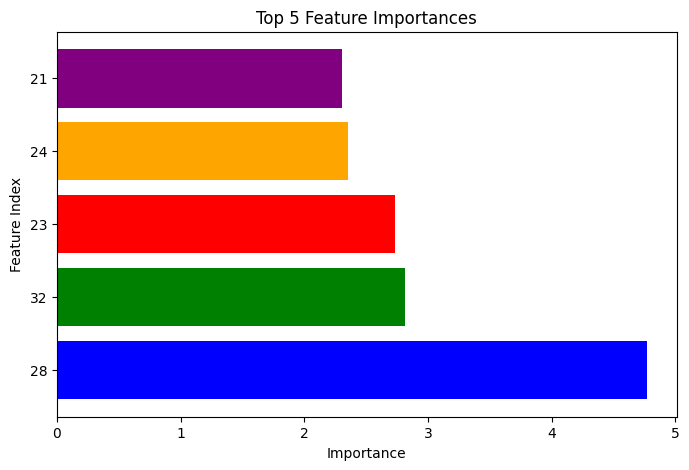

In [22]:
# Define colors for bars
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot horizontal bar chart of top 5 feature importances with different colors
top_n = 5
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_indices][:top_n], align='center', color=colors)
plt.yticks(range(top_n), sorted_indices[:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Top 5 Feature Importances')
plt.show()

In [23]:
# Get the weights of the connections between input and hidden layers
weights_input_hidden = model.layers[0].get_weights()[0]

# Compute feature importances based on the weights
importances = np.mean(np.abs(weights_input_hidden), axis=1)

# Get the indices that would sort the importances array in descending order
sorted_indices = np.argsort(importances)[::-1]

# Display top 5 feature importance
top_n = 5
for i in range(top_n):
    print(f"Feature {sorted_indices[i]}: Importance {importances[sorted_indices[i]]}")

Feature 28: Importance 4.068866729736328
Feature 32: Importance 2.3986618518829346
Feature 23: Importance 2.0759472846984863
Feature 31: Importance 1.769329309463501
Feature 24: Importance 1.6981688737869263


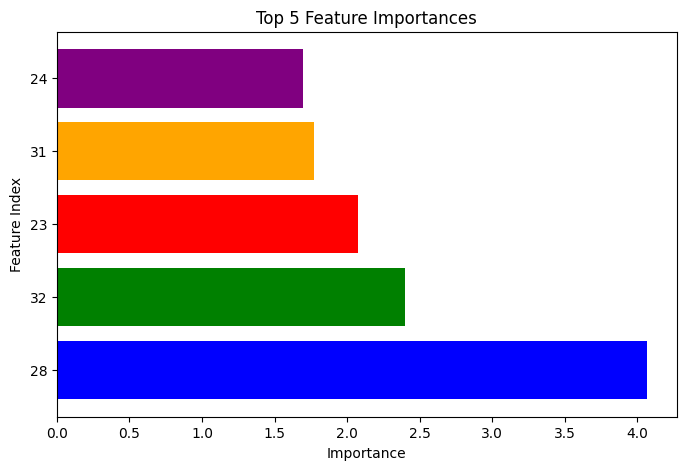

In [24]:
# Define colors for bars
colors = ['blue', 'green', 'red', 'orange', 'purple']

# Plot horizontal bar chart of top 5 feature importances with different colors
top_n = 5
plt.figure(figsize=(8, 5))
plt.barh(range(top_n), importances[sorted_indices][:top_n], align='center', color=colors)
plt.yticks(range(top_n), sorted_indices[:top_n])
plt.xlabel('Importance')
plt.ylabel('Feature Index')
plt.title('Top 5 Feature Importances')
plt.show()